# Momentum and Missed Tackles

## Introduction
- Missed tackles
- Momentum
- Exploration of metrics

## Data Collection Method
- run plays
- frame where defender is between 1.8 and 2.2 yards from the ball carrier
- only tackles (and assists) and missed tackles
- remove instances where defender is not in a position to make a tackle (wrong orientation)
    - contact not in field of play
    - contact behind either player
- down sampled tackles to match number of missed tackles (easier visualization of distributions)

## Momentum
Momentum is a critical component of all contact sports and tackling in football is an example of a sports collision. Collisions, in physics, are ruled by the law of momentum conservation which states that momentum in a collision is neither created nor lost, but must remain the same before and after an event such as a tackle. While football is a complex enviroment in the real world, this concept of conservation of momentum creates an interesting platform to study football tackles. 

The simplest investigation into the momentum of tackles is to explore the momentum of the ball carriers and the defenders as isolated entities. The histogram and box plot of the ball carrier momentum shows that more tackles are missed when the ball carrier has more momentum. Nothing shocking there, the object with more momentum will maintain some of this momentum after the collision. This tracks with football intuition, where we would expect the ball carrier to break through more attempted tackles when he has more momentum in the run. 
- Increased momentum of the ball carrier leads to more missed tackles
    * *histogram or box plot of momentum of ball carrier* (#1)

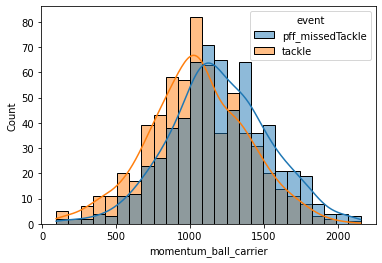

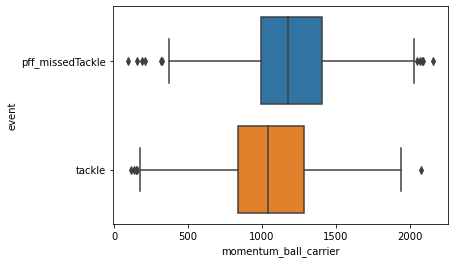

In [13]:
hist(sampled_df, 'momentum_ball_carrier')
box(sampled_df, 'momentum_ball_carrier')

The histogram and box plot of the defenders' momentum show the same trend. Higher momentums result in an increased chance of missing tackles. This is one of the instances where the simplification of tackles to a perfect system does not provide useful intuition. However, this still makes sense when using football intuition. Increased momentum often comes with a decrease in precision and control. When defenders are flying at the ball carrier with less control they may not be able to line up a perfect hit, or wrap the ball carrier to bring them to the ground.

Another interesting comparison here is the distribution differences between the ball carriers and the defenders. The ball carriers' momentum is fairly evenly distributed around 1000 yards/sec while the defenders' momentum center is closer to 750 yards/sec and shows a longer tail with higher maximum momentums for both made and missed tackles. 
- Increased momentum of the defender leads to more missed tackles
    * *histogram or box plot of momentum of defender* (#2)

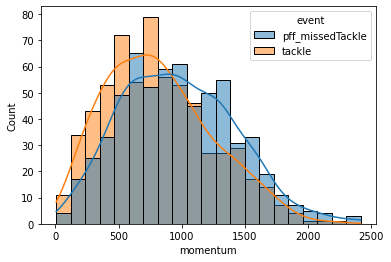

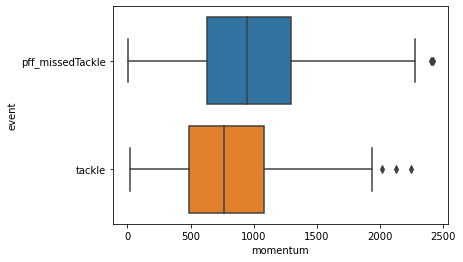

In [14]:
hist(sampled_df, 'momentum')
box(sampled_df, 'momentum')

The comparison of momentum between ball carrier and defender is even more clear when plotted together. The scatter plot shows the distribution of defenders' momentum below 500 yards/second to be concentrated mostly in the 500 to 1500 yards per second range of the ball carrier. The trend lines for tackles and missed tackles show a slight positive correlation between the players momentums. The missed tackle trend line is very similar in slope to the trend line of the made tackles, but has a higher y-intercept. This indicates that the ball carriers' momentum is more deterministic of made or missed tackles, and the relationship between increasing momentum of the ball carrier and tackler is consistent as the momentums increase. However, the less concentrated area in the lower ball carriers' momentum (0 to 500 yards/sec) shows a clear impact when it comes to the defenders' momentum. The lower momentums (0 to 1000 yards/sec) are typically tackles, while the higher momentums (1000 to 2000 yards/sec) are typically missed tackles.
- momentum of the ball carrier and defender are somewhat positively correlated, slope is similar between tackles and missed tackles, but missed tackles has a higher y intercept (better discussion of how to interpret this)
    * *scatter plot and trend line of momentum vs momentum_ball_carrier* (#3)

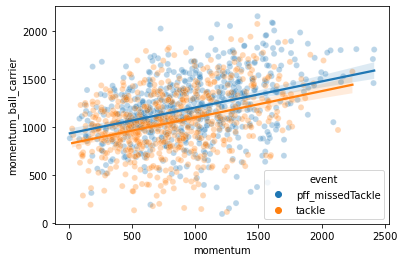

In [15]:
regression(sampled_df, 'momentum')

## Momentum in the plane of the field
Another useful component to momentum is that it is a vector measurement and can be communicated in terms of direction and magnitude. This is useful because it allows the momentum of a player to be decomposed from a single number into the parts of the momentum that are moving in different directions, such as the planes of a football field. The momentum was calculated to establish how much momentum was moving toward the scoring endzone vs the sidelines. Positive endzone momentum indicates the momentum is moving toward the endzone where the ball carrier is trying to score, and negative endzone momentum indicates the momentum is moving away from this scoring endzone. Positive sideline momentum indicates the momentum is moving toward the sideline that is to the left of the center before the ball is snapped, and negative sideline momentum indicates the momentum is moving toward the opposite sideline.

**Endzone Momentum**

When the endzone momentum of the ball carriers is plotted against the endzone momentum of the defenders more details of the tackling can be evalutated. These plots are separated so that defenderes with momentum toward the scoring endzone are separated from defenders with momentum away from the scoring endzone. When defenders' momentum is in the direction of the scoring endzone, the slight positive correlation observed between the defenders' and ball carriers' momentum is even more pronounced. This makes sense because defenders that are trailing the ball carrier need to match or exceed the speed of the ball carrier in order to catch them. The trendlines still show that higher ball carrier momentum leads to more missed tackles as is seen with the non-directional momentum measures. 

The plots of the endzone momentum when the defenders' momentum is moving away from the scoring endzone shows a different picture. The trendlines for both made and missed tackles show a negative correlation, indicating that it is more common for defenders to have higher momentums when they are flying downhill to make tackles against ball carriers who have not built up speed in their run. Also, the trendlines are not parallel, instead they cross around 600 yards/sec of defender momentum away from the scoring endzone. The crossing trendlines indicates that the importance of ball carrier and defender momentum varies in their contribution to made or missed tackles depending on which one is higher. When the defenders' momentum is small, increased ball carriers' momentum results in more missed tackles. However, when the defenders' momentum is higher, large ball carriers' momentum is rare and higher defenders' momentum leads to more missed tackles.

- Describe the decomposition of momentum into it's x and y components in terms of the football field
- **Momentum in the x direction**
    * Increased momentum of the ball carrier in the x direction leads to more missed tackles
    * The correlation between the momentum of the ball carrier and the momentum of the defender is dependent on the direction of the momentum. (Explain this better)
        - *scatter plot and trend line of momentum_x vs momentum_x_ball_carrier (decompose into multiple plots)* (#4)
        - Is this the place to explain that most of the defenders have momentum moving in the same x direction as the ball carrier? 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  


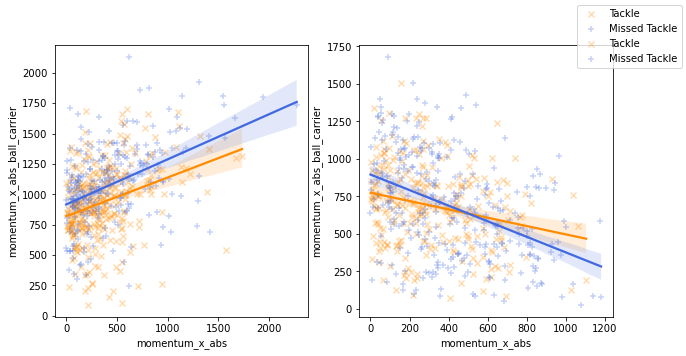

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_1_df = sampled_df[(sampled_df['momentum_x'] > 0) & (sampled_df['momentum_x_ball_carrier'] > 0)]
quad_plot_momentum(plot_1_df, ax[0], 'momentum_x_abs', 'momentum_x_abs_ball_carrier')
plot_2_df = sampled_df[(sampled_df['momentum_x'] < 0) & (sampled_df['momentum_x_ball_carrier'] > 0)]
quad_plot_momentum(plot_2_df, ax[1], 'momentum_x_abs', 'momentum_x_abs_ball_carrier')
fig.legend(loc='best')

**Sideline Momentum**

The interesting relationship between the defenders' and ball carriers' endzone momentum is not present in the sideline momentum. When the players' sideline momentums are plotted a strong positive correlation is present. The ball carriers' momentum toward either the left or the right sideline requires the defenders to drive their momentum in the same direction in order to make contact. One interesting note from this plot, most of the outliers and plays at the edges of the distribution are missed tackles. This indicates that larger differences between the sideline momentum of the defender and ball carrier lead to more missed tackles. 

In addition to the plane of the football field, there is another plane that can be used to explore momentum in tackles. This new plane is the plane of the ball carrier, a single plane that can provide context about the relative directional momentum of the ball carrier and defender in a pair of metrics.

- **Momentum in the y direction**
    * Momentum in the y direction is highly positively correlated between the ball carrier and the defender. This is intuitive because the defender will need to move toward the sideline as the ball carrier does.
        - *scatter plot and trend line of momentum_y vs momentum_y_ball_carrier* (#5)
    * Lead into adjusting the plane of momentum from the plane of the field to the plane of the ball carrier.

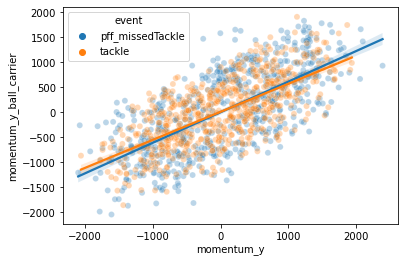

In [17]:
regression(sampled_df, 'momentum_y')

## Momentum in the plane of the ball carrier
- Explain the rotation
    * *breaking this down will need a visual* (#6)

**Momentum Perpendicular to the Ball Carrier**

When the plane of the momentum is adjusted in this way it is easier to evaluate details like momentum directed to the right or left of the ball carrier. This perpendicular momentum is visualized in the following histogram. The distribution of the missed tackles shows an increase when momentum is directed to the left of the ball carrier, but this difference is not visible in the tackles distribution. It is likely this variation is caused by the smaller sample size of the missed tackles. When the tackles distribution is down sampled, some random samples show a increase in tackles when the defender momentum is directed to the right of the ball carrier even though this increase is not present in the distribution as a whole. 

While this difference is possibly caused by sampling differences, the difference in the width and height of the distributions is more definitive. When less of the defenders momentum is directed perpendicular to the ball carrier, more tackles are made and fewer tackles are missed. Meanwhile, the missed tackles distribution shows longer tails indicating that more tackles are missed when more of the defenders momentum is directed to the left or right of the ball carrier. 

- Momentum perpendicular to the ball carrier indicates more tackles are missed when the momentum of the tackler is directed to the left of the ball carrier. This could be due to small sample size of the missed tackles. 
- The distribution of the missed tackles is wider than that of the tackles. More tackles are missed when more of the momentum is directed to the sides of the ball carrier than when the momentum is directed perfectly in line with the direction of the ball carrier movement.
    * *hist or violin of contact_angle_momentum_y* (#7)

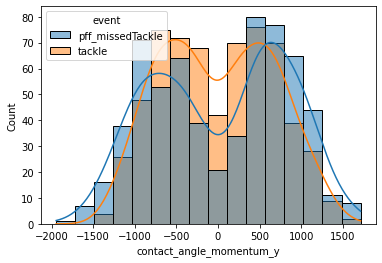

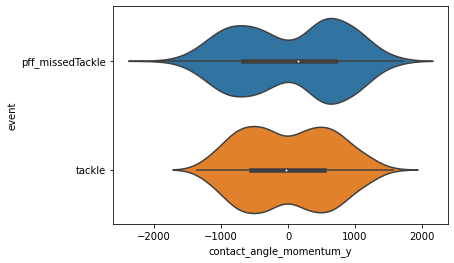

In [18]:
hist(sampled_df, 'contact_angle_momentum_y')
violin(sampled_df, 'contact_angle_momentum_y')

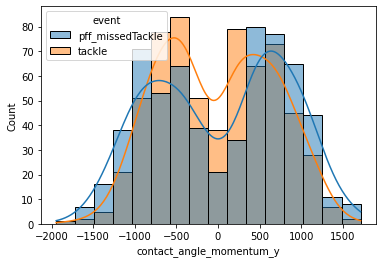

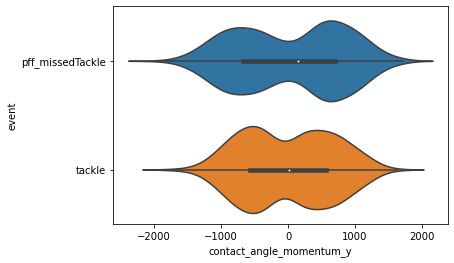

In [24]:
hist(sampled_df_2, 'contact_angle_momentum_y')
violin(sampled_df_2, 'contact_angle_momentum_y')
# the down sampling is showing more tackles in the negative momentum_y
    #this is a product of down sampling
        # probably indicates the more missed tackles in the positive y is a factor
        # of small sample size
sampled_df_2.to_csv('right_tail_sample.csv')

**Momentum in the Direction of Ball Carrier Movement**

Just as the momentum of the ball carrier and defender can be compared as both a non-directional metric and in the direction of the endzone, the momentum of the players can be compared in the direction of the ball carriers' movement. In this situation all of the ball carriers' momentum is moving in this direction, and the angle of intersection is used to determine how much of the defenders' momentum is moving in this direction. The comparison of momentum in the direction of the ball carrier is very similar to the comparison of momentum in the direction of the endzone. The same positive correlation and higher impact of larger ball carrier momentum is present when the defenders' momentum is moving in the same direction as the ball carrier. Also, the negative correlation between momentum is present when the defenders' momentum is counter to the direction of the ball carriers' movement. But, contrary to the endzone momentum comparison, these trendlines are much closer to parallel and strengthen the position that increased ball carrier momentum leads to more missed tackles. 

Two things that become much more clear when decomposing the momentum into the plane of the ball carrier are the the heavy impact lower ball carrier momentum has on made tackles and number of defenders who are chasing the ball carrier. There are only a handful of missed tackles that occur when the ball carrier momentum is less than 500 yards/sec, no matter whether the defenders' momentum is moving in a consistent direction of the ball carriers or in an opposing direction. **This would be the place to visualize and explain some examples of defenders trailing ball carriers**


* *regression contact_angle_momentum vs momentum_ball_carrier* (#8)
    - all the momentum of the ball carrier is moving in the contact_angle direction, this regression is comparable to the momentum vs momentum_ball_carrier and momentum_x vs momentum_x_ball_carrier plots
    - what do you learn from this plot that is different than momentum vs momentum_ball_carrier plot?
        * distinction of momentum moving in the same direction as the ball carrier vs the opposite direction of the ball carrier
            - negative correlation when defender moving in opposite direction as ball carrier
            - rareness of defenders moving in the opposite direction of ball carrier

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


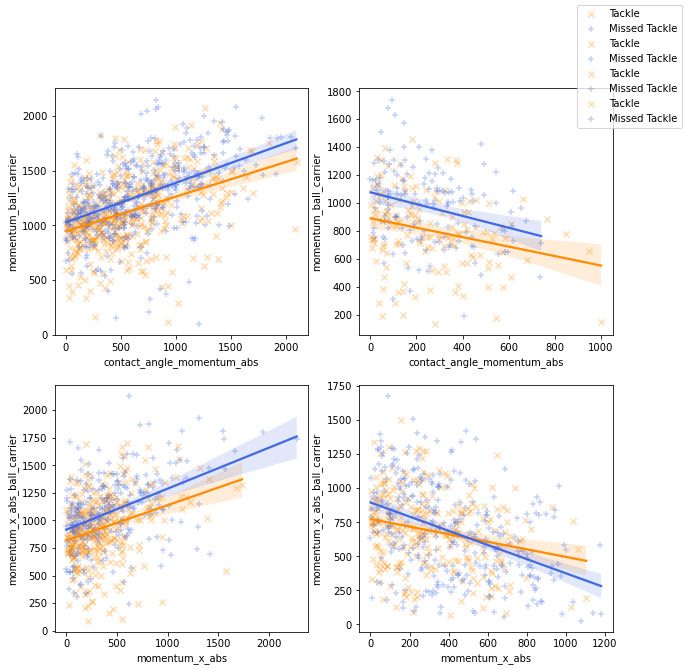

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
plot_1_df = sampled_df[sampled_df['contact_angle_momentum'] > 0]
quad_plot_momentum(plot_1_df, ax[0, 0], 'contact_angle_momentum_abs', 'momentum_ball_carrier')
plot_2_df = sampled_df[(sampled_df['contact_angle_momentum'] < 0)]
quad_plot_momentum(plot_2_df, ax[0 ,1], 'contact_angle_momentum_abs', 'momentum_ball_carrier')
plot_3_df = sampled_df[(sampled_df['momentum_x'] > 0) & (sampled_df['momentum_x_ball_carrier'] > 0)]
quad_plot_momentum(plot_3_df, ax[1, 0], 'momentum_x_abs', 'momentum_x_abs_ball_carrier')
plot_4_df = sampled_df[(sampled_df['momentum_x'] < 0) & (sampled_df['momentum_x_ball_carrier'] > 0)]
quad_plot_momentum(plot_4_df, ax[1, 1], 'momentum_x_abs', 'momentum_x_abs_ball_carrier')
fig.legend(loc='best')

Finally, the greatest value of momentum in the plane of the ball carrier is the ability to interpret the relationship between the the momentum of the defender and the direction of the ball carrier. Instead of needing to plot the defenders' endzone and sideline momentum (first plot) and compare it to the ball carriers' endzone and sideline momentum (second plot), it is possible to visualize this information in a single plot and understand how the values are related. Using the frames where the defenders are moving in a similar direction as the ball carriers (left side plots) as an example it is clear that the ball carriers' sideline momentum tends to decrease as their endzone momentum increases. Meanwhile the defenders' sideline momentum is less correlated with their endzone momentum. But once the defenders' momentum is decomposed into the plane of the ball carrier it is clear that the defenders' momentum increases both parallel and perpendicular to the direction of the ball carriers' momentum and that increased momentum perpendicular to the direction of the ball carriers' momentum leads to more missed tackles. 

* regression contact_angle_momentum vs contact_angle_momentum_y
    - the value of this plot is the ability to interpret the relationship between the momentum of the defender and the direction of the ball carrier. Instead of needing to plot the defenders momentum_x and momentum_y and compare it to the ball carriers momentum_x and momentum_y (where it is not possible to see how the values are related) this information can be visualized on a single plot.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  app.launch_new_instance()


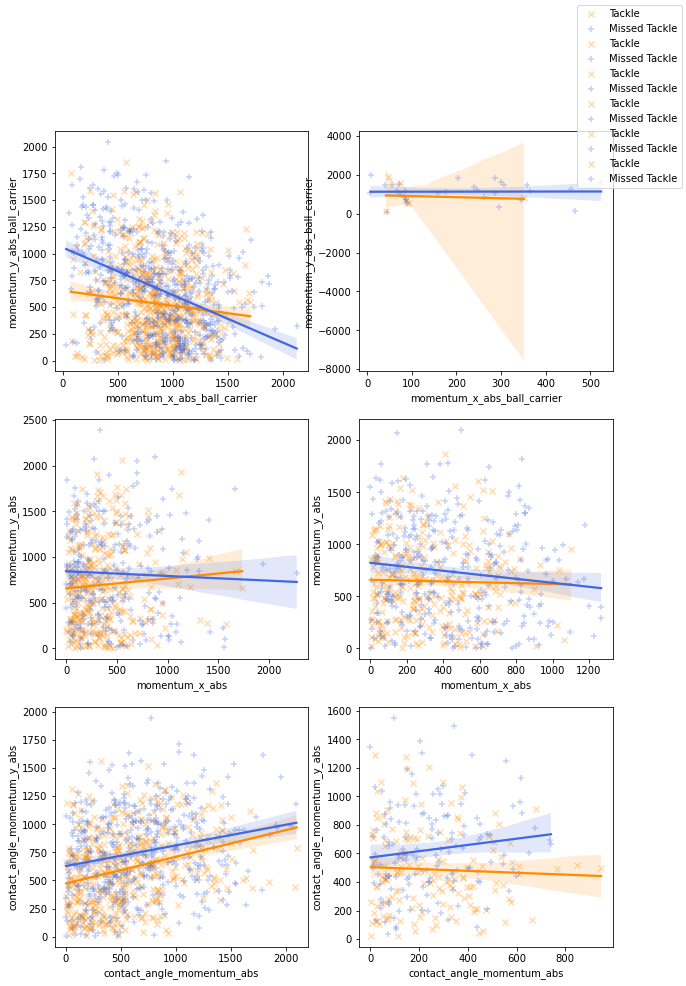

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))
plot_1_df = sampled_df[sampled_df['contact_angle_momentum'] > 0]
quad_plot_momentum(plot_1_df, ax[2,0], 'contact_angle_momentum_abs', 'contact_angle_momentum_y_abs')
plot_2_df = sampled_df[(sampled_df['contact_angle_momentum'] < 0) 
                       # one outlier, removed for easier view
                       & (sampled_df['contact_angle_momentum_abs'] < 1000)]
quad_plot_momentum(plot_2_df, ax[2,1], 'contact_angle_momentum_abs', 'contact_angle_momentum_y_abs')
plot_3_df = sampled_df[sampled_df['momentum_x'] > 0]
quad_plot_momentum(plot_3_df, ax[1,0], 'momentum_x_abs', 'momentum_y_abs')
plot_4_df = sampled_df[(sampled_df['momentum_x'] < 0)]
quad_plot_momentum(plot_4_df, ax[1,1], 'momentum_x_abs', 'momentum_y_abs')
plot_5_df = sampled_df[sampled_df['momentum_x_ball_carrier'] > 0]
quad_plot_momentum(plot_5_df, ax[0,0], 'momentum_x_abs_ball_carrier', 'momentum_y_abs_ball_carrier')
plot_6_df = sampled_df[(sampled_df['momentum_x_ball_carrier'] < 0)]
quad_plot_momentum(plot_6_df, ax[0,1], 'momentum_x_abs_ball_carrier', 'momentum_y_abs_ball_carrier')
fig.legend(loc='best')

## Conclusion
- Most important take aways
    - can I find examples of players that match some of the explanations?
- Future work

# Plots

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
run_metrics_df = pd.read_csv('../data/processed/run_plays_12-22_about2yards.csv')

In [3]:
# Clean data
def clean_data(metrics_df):
    metrics_df['event'].replace('assist', 'tackle', inplace=True)
    metrics_df.drop(metrics_df[metrics_df['event'] == 'forcedFumble'].index, inplace=True)
    
    metrics_df['tackler_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
    metrics_df['ball_carrier_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
    metrics_df['diff_time_to_contact'].replace([np.inf, -np.inf], 1000, inplace=True)
    
    # must be within field of play, and less than 5 seconds from contact point at current speed
    metrics_df['make_contact'] = ((metrics_df['x_contact'] < 110) & 
                                  (metrics_df['x_contact'] > 0) &
                                  (abs(metrics_df['diff_time_to_contact']) < 5)
                                 )
    
    metrics_df['in_field'] = ((metrics_df['x_contact'] < 110) & 
                          (metrics_df['x_contact'] > 0) &
                          (metrics_df['y_contact'] < 53.3) & 
                          (metrics_df['y_contact'] > 0)
                         )
    # reduce data to only contact in field of play
    metrics_df_in_field = metrics_df[metrics_df['in_field'] & (metrics_df['behind_player'] == False)]
    return metrics_df_in_field

In [4]:
run_metrics_df = clean_data(run_metrics_df)

In [5]:
# Define plotting functions
def hist(df, metric):
    sns.histplot(df, x=metric, hue="event", kde=True)
    plt.show()

def violin(df, metric):
    sns.violinplot(df, x=metric, y="event")
    plt.show()

def box(df, metric):
    sns.boxplot(df, x=metric, y="event")
    plt.show()

def regression(df, metric):
    ax = sns.scatterplot(df, x=metric, y=f"{metric}_ball_carrier", 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric, y=f"{metric}_ball_carrier", scatter=False)
    plt.show()

def regression_2(df, metric1, metric2):
    ax = sns.scatterplot(df, x=metric1, y=metric2, 
                         hue='event', hue_order=df['event'].unique(), alpha=0.3)
    for event_type in df['event'].unique():
        plotting_df = df.copy()
        plotting_df = plotting_df[plotting_df['event'] == event_type]
        sns.regplot(plotting_df, x=metric1, y=metric2, scatter=False)
    plt.show()

In [6]:
run_metrics_df['event'].value_counts()

None                11728
tackle               6105
pff_missedTackle      629
Name: event, dtype: int64

In [7]:
sampled_df = run_metrics_df.groupby('event').apply(lambda x: x.sample(n=629, random_state=42))
sampled_df = sampled_df[sampled_df['event'] != 'None']

In [8]:
sampled_df_2 = run_metrics_df.groupby('event').apply(lambda x: x.sample(n=629))
sampled_df_2 = sampled_df_2[sampled_df_2['event'] != 'None']

In [9]:
def quad_plot_momentum(plot_df, ax, x_column, y_column):
    colors = ['darkorange', 'royalblue']
    markers = ['x', '+']
    values = ['tackle', 'pff_missedTackle']
    labels = ['Tackle', 'Missed Tackle']

    for i, value in enumerate(values):
        ax = sns.regplot(x=x_column, y=y_column, ax=ax,
                         color=colors[i],
                         marker=markers[i], 
                         data=plot_df[plot_df.event == value],
                         label=labels[i],
                         scatter_kws={'alpha': 0.3})

In [10]:
sampled_df['momentum_x_abs'] = abs(sampled_df['momentum_x'])
sampled_df['momentum_x_abs_ball_carrier'] = abs(sampled_df['momentum_x_ball_carrier'])
sampled_df['contact_angle_momentum_abs'] = abs(sampled_df['contact_angle_momentum'])

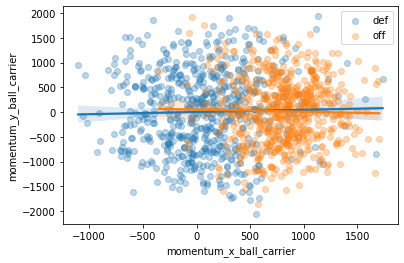

In [11]:
plotting_df = sampled_df[sampled_df['event'] == 'tackle']
ax = sns.regplot(plotting_df, x='momentum_x', y='momentum_y',
                 label='def', scatter_kws={'alpha': 0.3})
sns.regplot(plotting_df, x='momentum_x_ball_carrier', y='momentum_y_ball_carrier',
            label='off', scatter_kws={'alpha': 0.3})
plt.legend()
plt.show()

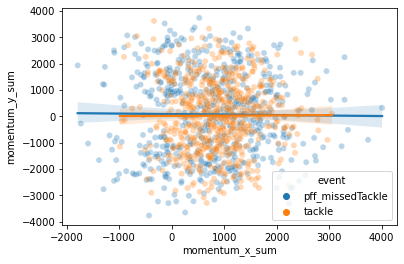

In [12]:
regression_2(sampled_df, 'momentum_x_sum', 'momentum_y_sum')

In [ ]:
import re, random
# from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2

x = sampled_df['contact_angle_momentum']
y = sampled_df['contact_angle_momentum_y_abs']
z = sampled_df['momentum']
c = sampled_df['event'].replace({'tackle': 'orange', 'pff_missedTackle': 'blue'})


ax.scatter(x, y, z, c=c, marker='o')
ax.set_xlabel('Defender Momentum Parallel')
ax.set_ylabel('Defender Momentum Perpendicular (abs)')
ax.set_zlabel('Ball Carrier Momentum')

plt.show()